In [48]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import ndimage
from skimage import io, img_as_float32
from skimage.transform import rescale
from skimage.color import rgb2gray
from mpl_toolkits.mplot3d import Axes3D

## Q1: Explicitly desribe image convolution: the input, the transformation, and the output. Why is it useful for computer vision?

Answer: Image convolution is a type of image filtering technique to achieve certain operations such as blurring, edge detection and feature extraction. The input is an image, and the convolution process uses a filter of user-defined size (usually 3x3) which is flipped 180 degrees. The flipped filter starts from the top left corner of the image and moves n pixels to the right at each step where n is the specified stride size. Once it hits the edge of the image it will move n pixels down and starts from the left again. At each step, the tensor dot between the filter and the corresponding portion of the image will be taken and the new value will become the new pixel value for the convolved image. This will reduce the dimension of the original image and can extract meaningful features such as horizontal and vertical edges. Different filters will achieve different goals. For example, a box filter will achieve smoothing effect by removing sharp features since it replaces each pixel with the average of its surrounding pixels (i.e. the surrounding 8 pixels for a 3x3 filter). It is useful for computer vision because it allows better extraction of information from images such as texture, edges and distinctive points. It can also remove noises, which usually exist in images captured in real life and are very important to remove for machine perception. Lastly, we can also detect patterns with image convolution so that we can match the desired patterns with certain templates.

## Q2: What is the difference between convolution and correlation? Construct a scenario which produces a different output between both operations. Please use scipy.ndimage.convolve and scipy.ndimage.correlate to experiment.

In [2]:
I = img_as_float32 (io.imread('RISDance.jpg'))

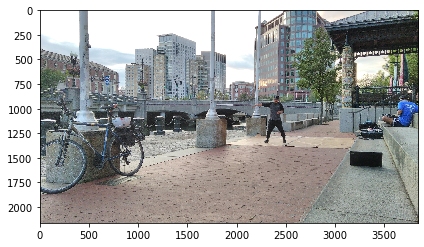

In [30]:
io.imshow(I)

(216, 384)


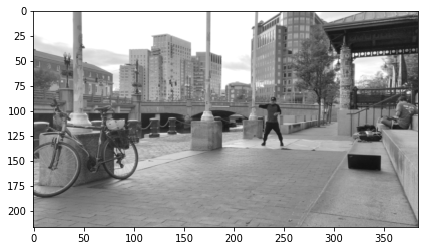

In [44]:
g = rescale(rgb2gray(I), 0.1)
print(g.shape)
io.imshow(g)

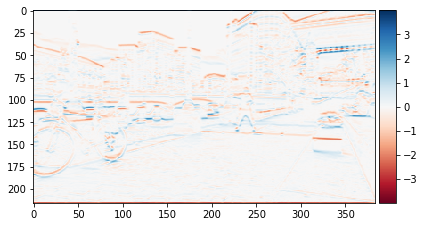

In [53]:
f = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
convolution = ndimage.convolve(g, f, mode = 'constant', cval = 0.0)
io.imshow(convolution)

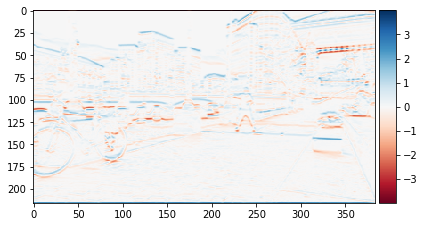

In [54]:
correlation = ndimage.correlate(g, f, mode = 'constant', cval = 0.0)
io.imshow(correlation)

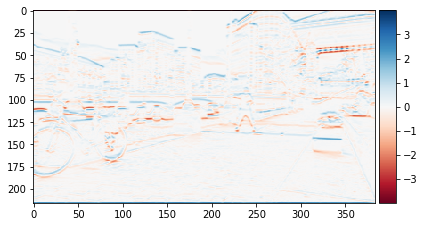

In [43]:
f_sym = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
convolution_sym = ndimage.convolve(g, f_sym, mode = 'constant', cval = 0.0)
io.imshow(convolution_sym)

Answer: the convolution is the same as the correlation when the filter kernel is 180 degrees rotated (symmetrical). Convolution is associative while correlation is not. Convolution has the associative property where f * g * h = f * (g * h). As shown in the above cells, f is a horizonal edge detector and the image used is the provided image "RISDance.jpg" converted to grayscale and rescaled to (216, 384). However, the resulting images shown using io.imshow is not displayed using grayscale intentionally for illustration purposes. The first two images are the result of convolution and correlation respectively and it is clear from the image that the results are inversed (blue/red color). The third image is the result of running the convolution with a symmetrical filter of the previous one and we can see that the result is the same as the correlation image using the original filter.

## Q3: What is the difference between a high pass and a low pass filter in how they are constructed, and what they do to the image? Please provide example kernels and output images.

Answer: High pass and low pass filters refer to the frequencies of an image that are allowed to pass through. A high pass filter will remove the low-frequency components from an image while a low pass filter will remove the high-frequency components. The kernel of a high pass filter can be constructed with a much higher center value compared to the surrounding cells to increase the contrast. On the other hand, the kernel of a low pass filter can be constructed by taking the average of all neighbouring cells, thereby achieving the "smoothing" effect. High pass filters are usually used for edge detection while low pass filters will smooth the original image. Following are examples of both high pass and low pass filters.

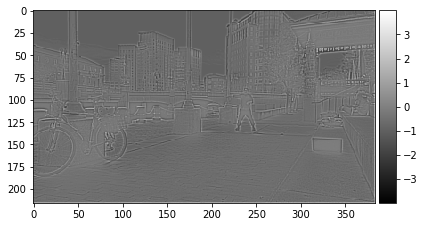

In [63]:
f_high = np.array([[-1,-1,-1], [-1,7,-1],[-1,-1,-1]])
g_high = ndimage.convolve(g, f_high, mode = 'constant', cval = 0.0)
io.imshow(g_high, cmap = 'gray')

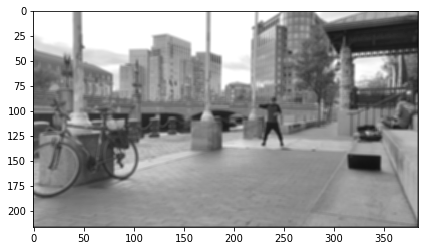

In [46]:
f_low = np.array([[1/9,1/9,1/9], [1/9,1/9,1/9],[1/9,1/9,1/9]])
g_low = ndimage.convolve(g, f_low, mode = 'constant', cval = 0.0)
io.imshow(g_low)

As shown in the images, the result of the high pass filter shows a much higher contrast and it is very easy to see the edges. On the contrary, the result of the low pass filter shows a much smoother version image as compared to the original one.

## Q4: How does computation time vary with filter sizes from 3 × 3 to 15 × 15 (for all odd and square filter sizes), and with image sizes from 0.25 Mpix to 8Mpix (choose your own intervals that you deem appropriate - not less than 8 intervals). Measure both using either scipy.ndimage.convolve or scipy.ndimage.correlate to produce a matrix of results. Use skimage.transform module to vary the size of the image. Use an appropriate charting function to plot your matrix of results such as Axed3D.scatter or Axes3D.plot surface. Does the results match your expectations given the number of multiply and add operations in convolutions? Use the Image: RISDance.jpg included in your assignment to perform these tests.

In [4]:
g = rgb2gray(I)
g.shape

(2160, 3840)

In [5]:
g.shape[0] * g.shape[1]

8294400

In [8]:
r = rescale(g, 0.2)
r.shape[0] * r.shape[1]

331776

In [46]:
f = np.array([[1/9,1/9,1/9], [1/9,1/9,1/9],[1/9,1/9,1/9]])
times = []
image_sizes = []
for i in range (2, 10):
    r = rescale (g, i * 0.1)
    image_sizes.append(r.shape[0] * r.shape[1])
    for j in range(3, 16, 2):
        start = time.time()
        ndimage.convolve(g, f, mode = 'constant', cval = 0.0)
        end = time.time()
        times.append(end - start)

image_sizes = np.repeat(image_sizes, 7)
filter_sizes = np.tile(np.arange(3, 16, 2), 8)

Text(0.5, 0.92, 'Image Convolution Time Comparison')

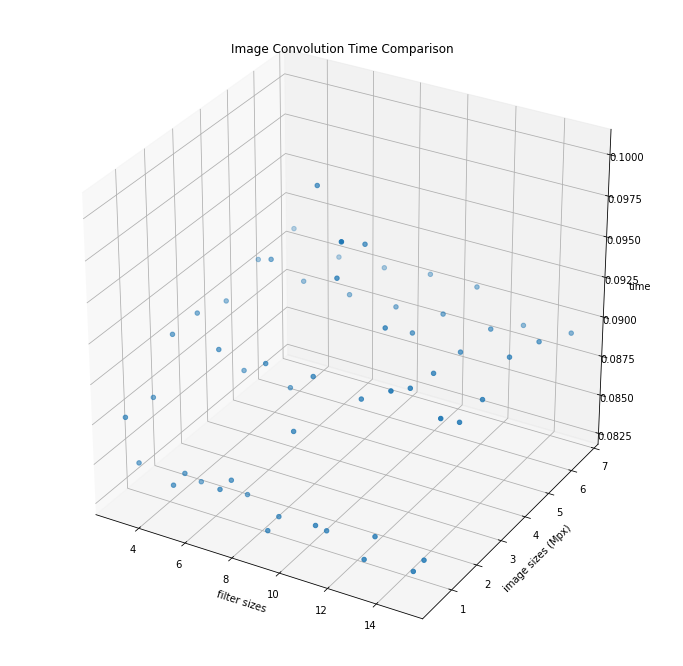

In [70]:
fig = plt.figure(figsize=(12, 12))
# ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter(filter_sizes, image_sizes / 10**6, times)
ax.set_xlabel('filter sizes')
ax.set_ylabel('image sizes (Mpx)')
ax.set_zlabel('time')
ax.set_title('Image Convolution Time Comparison')


Answer: As shown on the scatter plot, as filter size increases, the convolution computation time actually decreases as there are less steps to stride. However, as the image size increases, the computation time increases because more steps will needed to be performed before the entire image is convolved. This result matches my expectations because less number of steps results in less number of add/multiply operations needed to be performed. 